In [143]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [144]:
df = pd.read_excel('/Users/manasmaurya/Downloads/Data_Train.xlsx')

In [145]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [146]:
df.drop('Name', axis = 1, inplace = True)

In [147]:
df.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [148]:
df.dropna(inplace = True)

In [149]:
len(df.Power.loc[df['Power'] == 'null bhp'])

103

In [150]:
i = df.Power.loc[df['Power'] == 'null bhp'].index
df.drop(i, axis = 0, inplace = True)

In [151]:
df['Transmission'] = df['Transmission'].map({'Manual' : 0, 'Automatic' : 1})

In [152]:
df['Power'] = df['Power'].str.strip(' bhp').astype('float')
df['Engine'] = df['Engine'].str.strip(' CC').astype('float')

In [153]:
df['Mileage'] = df['Mileage'].str.strip(' km/kg')
df['Mileage'] = df['Mileage'].str.strip(' kmpl').astype('float')

In [154]:
df.drop(['Location','Year'], axis = 1).corr()

,Kilometers_Driven,Transmission,Mileage,Engine,Power,Seats,Price
Kilometers_Driven,1.000000,-0.024111,-0.060608,0.093030,0.033490,0.083072,-0.008249
Transmission,-0.024111,1.000000,-0.368398,0.501928,0.644688,-0.074554,0.585623
Mileage,-0.060608,-0.368398,1.000000,-0.637258,-0.538844,-0.331576,-0.341652
Engine,0.093030,0.501928,-0.637258,1.000000,0.866301,0.401116,0.658047
Power,0.033490,0.644688,-0.538844,0.866301,1.000000,0.101460,0.772843
Seats,0.083072,-0.074554,-0.331576,0.401116,0.101460,1.000000,0.055547
Price,-0.008249,0.585623,-0.341652,0.658047,0.772843,0.055547,1.000000


In [155]:
df1 = df[['Transmission','Mileage','Engine','Power','Price']]
df1.head()

,Transmission,Mileage,Engine,Power,Price
0,0,26.60,998.0,58.16,1.75
1,0,19.67,1582.0,126.20,12.50
2,0,18.20,1199.0,88.70,4.50
3,0,20.77,1248.0,88.76,6.00
4,1,15.20,1968.0,140.80,17.74


In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

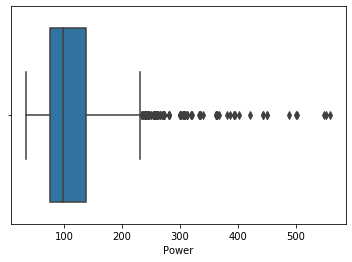

232.75 -19.64999999999999


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


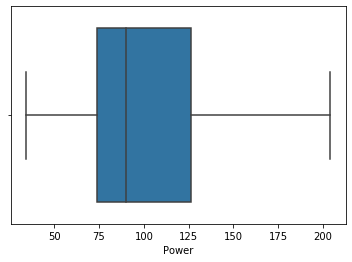

In [157]:
sns.boxplot(df1.Power)
plt.show()
q3 = df1.Power.quantile(.75)
q1 = df1.Power.quantile(.25)
iqr = q3-q1
uw = q3+1.5*iqr
lw = q1-1.5*iqr
print(uw,lw)
i = df1.Power.loc[df1.Power > uw].index
df1.drop(i,inplace = True)
q3 = df1.Power.quantile(.75)
q1 = df1.Power.quantile(.25)
iqr = q3-q1
uw = q3+1.5*iqr
lw = q1-1.5*iqr
i = df1.Power.loc[df1.Power > uw].index
df1.drop(i,inplace = True)
sns.boxplot(df1.Power)

In [158]:
from sklearn.model_selection import train_test_split
X = df1.drop('Price',axis = 1)
y = df1[['Price']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 0)

In [159]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)
y_predict = model_1.predict(X_test)

In [160]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
rsq = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
print(rsq)
print(mse)

0.5970997092862935
26.672120276244243


In [161]:
df2 = df1.drop('Engine',axis = 1)

In [162]:
X = df2.drop('Price',axis = 1)
y = df2[['Price']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 0)
model_2 = LinearRegression()
model_2.fit(X_train,y_train)
y_predict = model_2.predict(X_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
rsq = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
print(rsq)
print(mse)

0.6010164440800225
26.41283125631469


In [163]:
df3 = df1.drop('Mileage', axis = 1)

In [164]:
X = df3.drop('Price',axis = 1)
y = df3[['Price']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 0)
model_3= LinearRegression()
model_3.fit(X_train,y_train)
y_predict = model_3.predict(X_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
rsq = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
print(rsq)
print(mse)

0.5858470064718915
27.417052582862592


In [165]:
final_model = model_2

In [166]:
testing_data = pd.read_excel('/Users/manasmaurya/Downloads/Data_Test.xlsx')
testing_data.Transmission = testing_data.Transmission.map({'Manual' : 0,'Automatic' : 1})
to_model = testing_data[['Transmission','Mileage','Power']]



In [167]:
to_model.Power = to_model.Power.str.strip(' bhp')
to_model.Power =  to_model.Power.str.replace('null','0').astype('float')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [168]:
to_model.Mileage = to_model.Mileage.str.strip(' km/kg')
to_model.Mileage = to_model.Mileage.str.strip(' kmpl').astype('float')

In [169]:
to_model.isnull().sum()

Transmission     0
Mileage          0
Power           10
dtype: int64

In [170]:
to_model = to_model.fillna(0)
y_testData_predict = final_model.predict(to_model)

In [171]:
y_testData_predict

array([[ 3.79647075],
       [ 0.76311355],
       [11.63866837],
       ...,
       [ 2.49672239],
       [10.74449475],
       [17.94706048]])

In [173]:
testing_data['predicted_price'] = y_testData_predict

In [174]:
testing_data.to_excel('pricePredictions.xlsx')